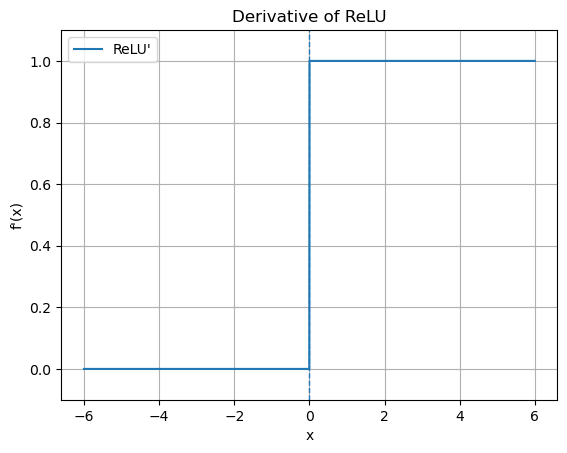

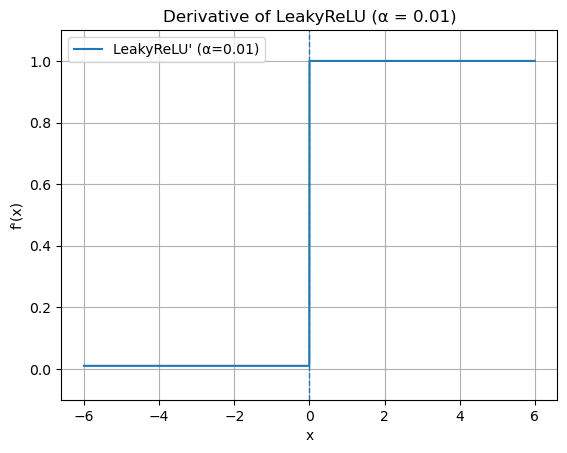

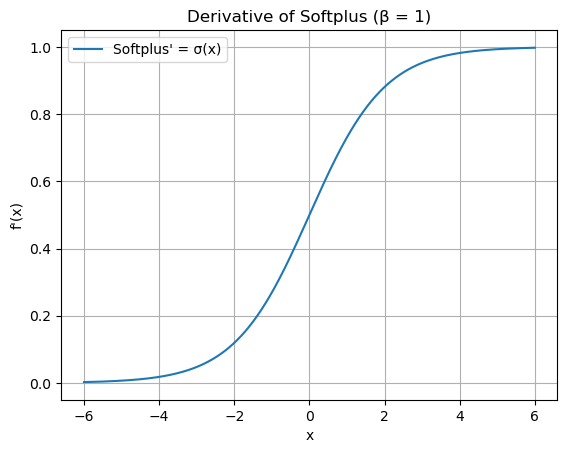

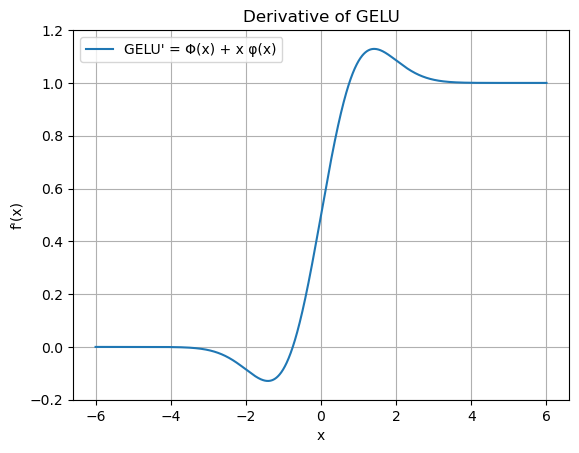

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 2000)

# ReLU derivative
def drelu(x):
    out = np.zeros_like(x)
    out[x > 0] = 1.0
    out[x == 0] = np.nan  # undefined at 0 -> show a gap
    return out

plt.figure()
plt.plot(x, drelu(x), label="ReLU'")
plt.axvline(0, linestyle="--", linewidth=1)
plt.ylim(-0.1, 1.1)
plt.title("Derivative of ReLU")
plt.xlabel("x"); plt.ylabel("f'(x)"); plt.legend(); plt.grid(True)
plt.show()

# LeakyReLU derivative (alpha = 0.01)
alpha = 0.01
def dleakyrelu(x, alpha=0.01):
    out = np.full_like(x, alpha, dtype=float)
    out[x > 0] = 1.0
    out[x == 0] = np.nan
    return out

plt.figure()
plt.plot(x, dleakyrelu(x, alpha), label="LeakyReLU' (α=0.01)")
plt.axvline(0, linestyle="--", linewidth=1)
plt.ylim(-0.1, 1.1)
plt.title("Derivative of LeakyReLU (α = 0.01)")
plt.xlabel("x"); plt.ylabel("f'(x)"); plt.legend(); plt.grid(True)
plt.show()

# Softplus derivative (β=1) -> sigmoid
def sigmoid(x):
    out = np.empty_like(x, dtype=float)
    pos = x >= 0
    neg = ~pos
    out[pos] = 1 / (1 + np.exp(-x[pos]))
    expx = np.exp(x[neg])
    out[neg] = expx / (1 + expx)   # stable
    return out

plt.figure()
plt.plot(x, sigmoid(x), label="Softplus' = σ(x)")
plt.title("Derivative of Softplus (β = 1)")
plt.xlabel("x"); plt.ylabel("f'(x)"); plt.ylim(-0.05, 1.05)
plt.legend(); plt.grid(True)
plt.show()

# GELU derivative: Φ(x) + x φ(x)
def phi(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

# CDF via erf (no scipy needed)
vec_erf = np.vectorize(math.erf)
def Phi(x):
    return 0.5 * (1 + vec_erf(x/np.sqrt(2)))

def dgelu(x):
    return Phi(x) + x * phi(x)

plt.figure()
plt.plot(x, dgelu(x), label="GELU' = Φ(x) + x φ(x)")
plt.title("Derivative of GELU")
plt.xlabel("x"); plt.ylabel("f'(x)"); plt.ylim(-0.2, 1.2)
plt.legend(); plt.grid(True)
plt.show()